In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime
import re

In [3]:
#create data frame
df = pd.read_csv("Resources/Reduced Data.csv")
df.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,01/02/2022,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,01/03/2022
1,1,202221365,FAMILY DISTURBANCE,01/02/2022,2228,10500 S IH 35 SVRD SB,78748.0,2,01/03/2023
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,12/26/2021,100,7312 VIA CORRETO DR,78749.0,6,01/11/2022
3,3,202221283,THEFT CATALYTIC CONVERTER,12/29/2021,537,3600 PRESIDENTIAL BLVD,78719.0,S,03/28/2022
4,4,20225000099,BURGLARY OF VEHICLE,12/25/2021,545,11608 SPICEWOOD PKWY,78750.0,8,01/03/2022


In [5]:
district_count = df['APD District'].value_counts()
district_count

1     14294
2     14225
3      9486
4      8721
7      8061
5      7701
6      7445
8      5179
S       577
88      199
D       118
B        20
A        14
P        10
C         6
Name: APD District, dtype: int64

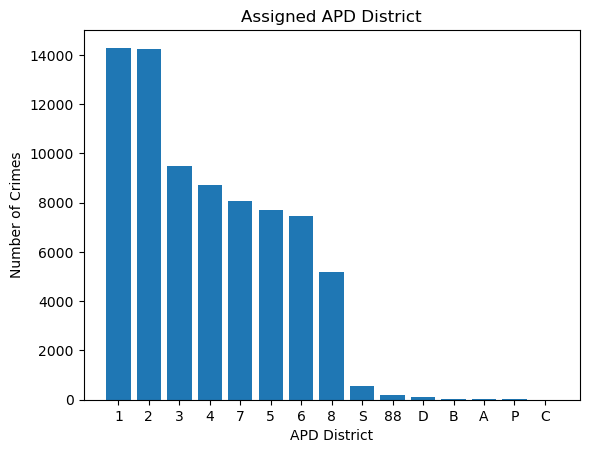

In [18]:
plt.bar(district_count.index, district_count.values)


plt.title("Assigned APD District")
plt.xlabel("APD District")
plt.ylabel("Number of Crimes")

plt.show()

In [7]:
#convert to datetime format
df['Occurred Date'] = pd.to_datetime(df['Occurred Date'])
df['Clearance Date'] = pd.to_datetime(df['Clearance Date'])
df.head()


,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,2022-01-02,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,2022-01-03
1,1,202221365,FAMILY DISTURBANCE,2022-01-02,2228,10500 S IH 35 SVRD SB,78748.0,2,2023-01-03
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,2021-12-26,100,7312 VIA CORRETO DR,78749.0,6,2022-01-11
3,3,202221283,THEFT CATALYTIC CONVERTER,2021-12-29,537,3600 PRESIDENTIAL BLVD,78719.0,S,2022-03-28
4,4,20225000099,BURGLARY OF VEHICLE,2021-12-25,545,11608 SPICEWOOD PKWY,78750.0,8,2022-01-03


In [8]:
#calculate amount of days it took to clear each offense
df['Days to Clear'] = (df['Clearance Date'] - df['Occurred Date']).dt.days
df.head()

,Unnamed: 0,Incident Number,Highest Offense Description,Occurred Date,Occurred Time,Address,Zip Code,APD District,Clearance Date,Days to Clear
0,0,202221104,DEPENDENT AND NEGLECTED CHILD,2022-01-02,1956,00 BLOCK IH 35 SVRD NB / E BRAKER LN,78753.0,7,2022-01-03,1
1,1,202221365,FAMILY DISTURBANCE,2022-01-02,2228,10500 S IH 35 SVRD SB,78748.0,2,2023-01-03,366
2,2,20228000169,BURGLARY OF VEH-NO SUSPECT/FU,2021-12-26,100,7312 VIA CORRETO DR,78749.0,6,2022-01-11,16
3,3,202221283,THEFT CATALYTIC CONVERTER,2021-12-29,537,3600 PRESIDENTIAL BLVD,78719.0,S,2022-03-28,89
4,4,20225000099,BURGLARY OF VEHICLE,2021-12-25,545,11608 SPICEWOOD PKWY,78750.0,8,2022-01-03,9


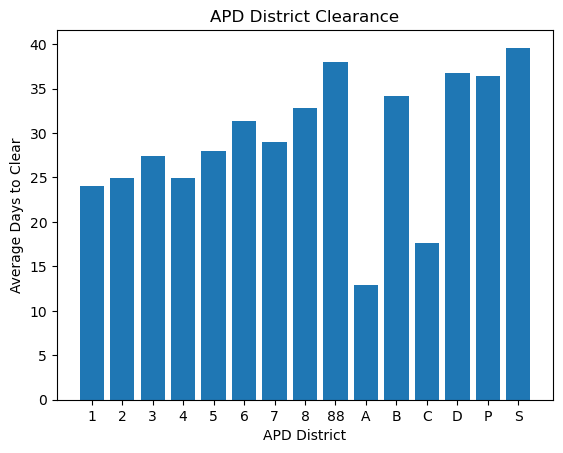

In [19]:
average_clear = df.groupby('APD District')['Days to Clear'].mean()
average_clear

plt.bar(average_clear.index, average_clear.values)


plt.title("APD District Clearance")
plt.xlabel("APD District")
plt.ylabel("Average Days to Clear")

plt.show()